In [62]:
import pandas as pd


#method = "smote"
method = "undersampling"

filename_train = "../data/" + method + "/dataframe_train.csv"
filename_test = "../data/" + method + "/dataframe_test.csv"

df_train = pd.read_csv(filename_train)
df_test = pd.read_csv(filename_test)

In [63]:
df_train.head()

,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,...,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Jour,Mois,FlagImpaye
0,60.92,1,0,0,0,545.0,0.006986,11.305842,0.001252,50.500371,...,1,4.0,4.0,4.0,60.92,0.0,38669,4,5,0
1,76.14,0,1,1,1,1.0,3.807000,-1.492390,0.863439,20.270270,...,1,5.0,5.0,5.0,76.14,0.0,66509,17,5,0
2,50.99,1,0,0,0,547.0,0.000000,0.000000,0.000000,39.789501,...,1,4.0,4.0,4.0,50.99,0.0,35585,18,3,0
3,70.13,0,1,1,1,1.0,0.000000,0.000000,0.000000,33.596564,...,1,5.0,5.0,5.0,70.13,0.0,60571,8,4,0
4,70.13,0,1,1,1,1.0,0.000000,0.000000,0.000000,33.596564,...,1,5.0,5.0,5.0,70.13,0.0,60571,8,4,0


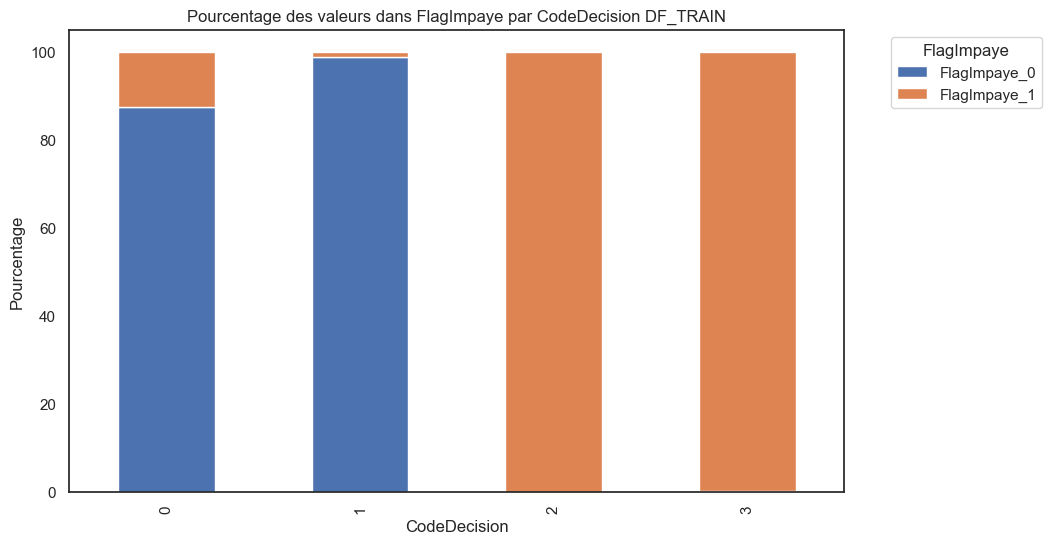

In [64]:
import matplotlib.pyplot as plt

table_correspondance = pd.crosstab(index=df_train['CodeDecision'], columns=df_train['FlagImpaye'], normalize='index') * 100

# Renommez les colonnes pour plus de clarté
table_correspondance.columns = ['FlagImpaye_0', 'FlagImpaye_1']

# Tracez un graphique à barres empilées
table_correspondance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Pourcentage des valeurs dans FlagImpaye par CodeDecision DF_TRAIN')
plt.xlabel('CodeDecision')
plt.ylabel('Pourcentage')
plt.legend(title='FlagImpaye', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le graphique
plt.show()

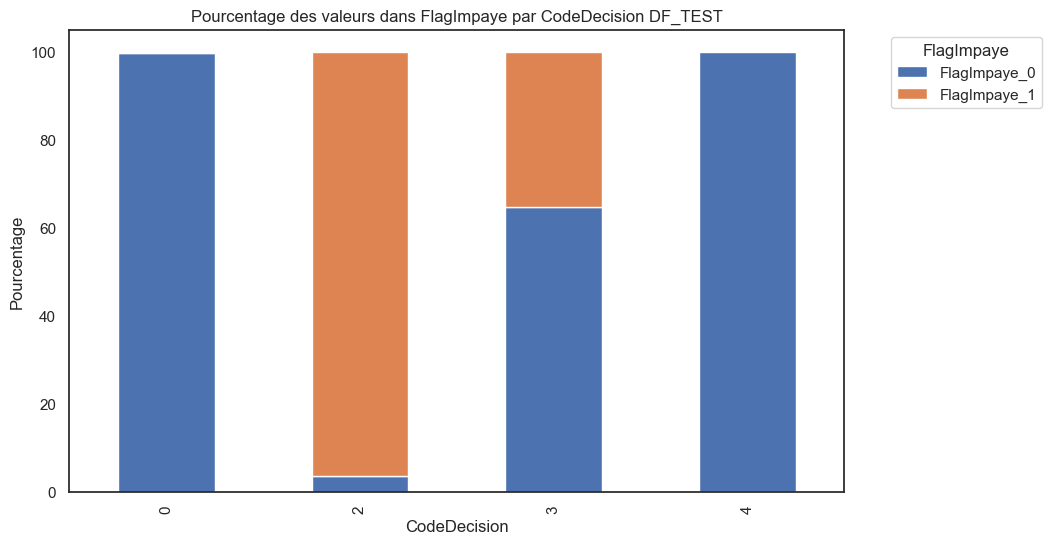

In [65]:
import matplotlib.pyplot as plt

table_correspondance = pd.crosstab(index=df_test['CodeDecision'], columns=df_test['FlagImpaye'], normalize='index') * 100

# Renommez les colonnes pour plus de clarté
table_correspondance.columns = ['FlagImpaye_0', 'FlagImpaye_1']

# Tracez un graphique à barres empilées
table_correspondance.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Pourcentage des valeurs dans FlagImpaye par CodeDecision DF_TEST')
plt.xlabel('CodeDecision')
plt.ylabel('Pourcentage')
plt.legend(title='FlagImpaye', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le graphique
plt.show()

In [66]:
# Code 0 Honnete
# Code 1 Honnete
# Code 2 FRAUDEUR
# Code 3 FRAUDEUR à 40%
# Code 4 que un seul dans toutes les données => inutile

<Axes: >

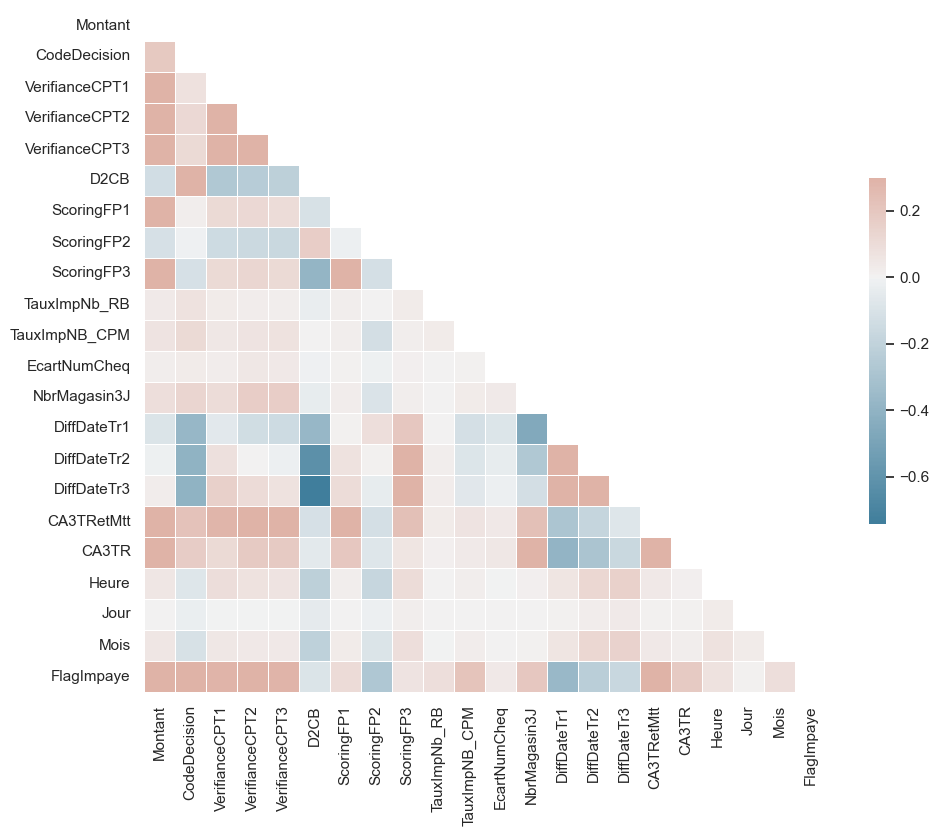

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [68]:
most_correlated_features = corr['CodeDecision'].abs().sort_values(ascending=False).index[1:]
print(most_correlated_features)
most_correlated_features = most_correlated_features[1:] # on enleve variable Flag Impaye
print(most_correlated_features)

Index(['FlagImpaye', 'DiffDateTr3', 'DiffDateTr2', 'DiffDateTr1', 'D2CB',
       'CA3TRetMtt', 'Montant', 'CA3TR', 'NbrMagasin3J', 'VerifianceCPT2',
       'ScoringFP3', 'VerifianceCPT3', 'TauxImpNB_CPM', 'Mois', 'Heure',
       'VerifianceCPT1', 'TauxImpNb_RB', 'EcartNumCheq', 'Jour', 'ScoringFP1',
       'ScoringFP2'],
      dtype='object')
Index(['DiffDateTr3', 'DiffDateTr2', 'DiffDateTr1', 'D2CB', 'CA3TRetMtt',
       'Montant', 'CA3TR', 'NbrMagasin3J', 'VerifianceCPT2', 'ScoringFP3',
       'VerifianceCPT3', 'TauxImpNB_CPM', 'Mois', 'Heure', 'VerifianceCPT1',
       'TauxImpNb_RB', 'EcartNumCheq', 'Jour', 'ScoringFP1', 'ScoringFP2'],
      dtype='object')


In [69]:
from sklearn.cluster import KMeans
import pickle as pckl

X_train = df_train[most_correlated_features]

# Clustering avec K-means
n_clusters = 4  # Vous pouvez ajuster le nombre de clusters en fonction de votre problème
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_train['Cluster_Code_Decision'] = kmeans.fit_predict(X_train)


# Sauvegarde du modèle
model_name = "kmeans"
filename = '../models/classif_code/' + model_name + '.pkl'
with open(filename, 'wb') as file:
    pckl.dump(kmeans, file)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [70]:
df_train.head()

,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,...,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Jour,Mois,FlagImpaye,Cluster_Code_Decision
0,60.92,1,0,0,0,545.0,0.006986,11.305842,0.001252,50.500371,...,4.0,4.0,4.0,60.92,0.0,38669,4,5,0,0
1,76.14,0,1,1,1,1.0,3.807000,-1.492390,0.863439,20.270270,...,5.0,5.0,5.0,76.14,0.0,66509,17,5,0,0
2,50.99,1,0,0,0,547.0,0.000000,0.000000,0.000000,39.789501,...,4.0,4.0,4.0,50.99,0.0,35585,18,3,0,0
3,70.13,0,1,1,1,1.0,0.000000,0.000000,0.000000,33.596564,...,5.0,5.0,5.0,70.13,0.0,60571,8,4,0,0
4,70.13,0,1,1,1,1.0,0.000000,0.000000,0.000000,33.596564,...,5.0,5.0,5.0,70.13,0.0,60571,8,4,0,0


In [71]:
X_test = df_test[most_correlated_features]
df_test['Cluster_Code_Decision'] = kmeans.predict(X_test)


# # Attribution de CodeDecision basée sur les statistiques descriptives
cluster_code_decision_mapping = df_train.groupby('Cluster_Code_Decision')['CodeDecision'].agg(lambda x: x.value_counts().idxmax()).to_dict()
df_test['CodeDecision'] = df_test['Cluster_Code_Decision'].map(cluster_code_decision_mapping)

# # Affichage des résultats
print(df_test[['Cluster_Code_Decision', 'CodeDecision']])

        Cluster_Code_Decision  CodeDecision
0                           0             0
1                           0             0
2                           0             0
3                           0             0
4                           0             0
...                       ...           ...
747406                      0             0
747407                      0             0
747408                      0             0
747409                      0             0
747410                      0             0

[747411 rows x 2 columns]


In [72]:
# Table croisée entre Cluster, CodeDecision, et FlagImpaye pour les données test
res = pd.crosstab(index=[df_train['Cluster_Code_Decision'], df_train['CodeDecision']], columns=df_train['FlagImpaye'], margins=True, margins_name='Total')
print(res)

FlagImpaye                              0      1   Total
Cluster_Code_Decision CodeDecision                      
0                     0             54985   7791   62776
                      1             23086    282   23368
                      2                 0  14538   14538
                      3                 2    718     720
1                     0                 0      4       4
                      2                 0     15      15
                      3                 0      2       2
2                     0                 0     16      16
                      1                 0      1       1
                      2                 0     30      30
                      3                 0      6       6
3                     0                 0     10      10
                      2                 0      5       5
                      3                 0      4       4
Total                               78073  23422  101495


In [73]:
filename_train = "../data/classif/" + method + "/dataframe_train.csv"
filename_test = "../data/classif/" + method + "/dataframe_test.csv"


df_train.to_csv(filename_train,index=False)
df_test.to_csv(filename_test,index=False)